In [25]:
import cv2
import matplotlib.pyplot as plt

In [26]:
sample_no = '06'
image_path = f"./data/sample_{sample_no}.jpg"

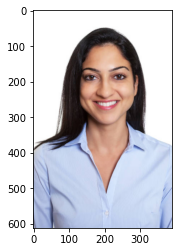

In [27]:
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)

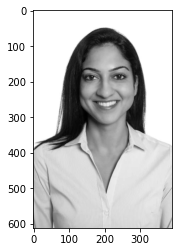

In [28]:
# converting the original image to grayscale
greys_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(greys_image, cmap='gray')

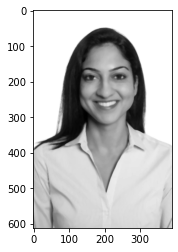

In [29]:
smooth_grays = cv2.medianBlur(greys_image, ksize=5)
plt.imshow(smooth_grays, cmap='gray')

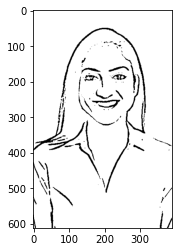

In [30]:
# highlighting edges to cartoonize the image
get_edge = cv2.adaptiveThreshold(smooth_grays, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=9, C=9)
plt.imshow(get_edge, cmap='gray')

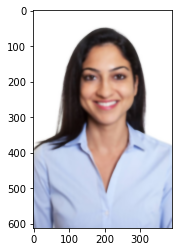

In [31]:
# applying the bilateral filter to remove the noise 
# and keep edge sharp
color_image = cv2.bilateralFilter(original_image, d=9, sigmaColor=300, sigmaSpace=300)
plt.imshow(color_image, cmap='gray')

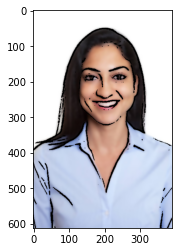

In [32]:
# use the edged_image as mask on the color_image
cartoon_image = cv2.bitwise_and(src1=color_image, src2=color_image, mask=get_edge)
plt.imshow(cartoon_image, cmap='gray')